In [7]:
import pandas as pd
import numpy as np
import scipy.io as sio
from scipy import signal
import matplotlib.pyplot as plt
from fairness.functions import *
from mne.decoding import  CSP
dataset_path_root = "/home/bruno/Academico/Doctorado/Neuro_Fairness/Shu_Dataset/DATASET_CSP_SD/"
participants=["sub-001","sub-002","sub-003","sub-004","sub-005",
              "sub-006","sub-007","sub-008","sub-009","sub-010",
              "sub-011","sub-012","sub-013","sub-014","sub-015",
              "sub-016","sub-017","sub-018","sub-019","sub-020",
              "sub-021","sub-022","sub-023","sub-024","sub-025"]
sessions = ["ses-01","ses-02","ses-03","ses-04","ses-05"]
dataset={}
for participant in participants:
    dataset[participant]={}
    data_path=participant+"_task_motorimagery_eeg_preprocessing_csp.mat"
    data=sio.loadmat(dataset_path_root + data_path)
    for session in sessions:
        dataset[participant][session +'_data_csp']=data[session +'_data_csp']
        dataset[participant][session +'_labels_trials']=data[session +'_labels_trials']
    dataset[participant]['sfreq']=np.squeeze(data['sfreq'])
    dataset[participant]['age']=np.squeeze(data['age'])
    dataset[participant]['gender']=data['gender'][0]
    dataset[participant]['group_medidator']=data['group_medidator'][0]
    dataset[participant]['id_participant']=data['id_participant'][0]

In [26]:
dataset_df = pd.DataFrame(dataset).transpose()
dataset_df['participant'] = participants
dataset_df.reset_index(inplace=True)
dataset_df

,index,ses-01_data_csp,ses-01_labels_trials,ses-02_data_csp,ses-02_labels_trials,ses-03_data_csp,ses-03_labels_trials,ses-04_data_csp,ses-04_labels_trials,ses-05_data_csp,ses-05_labels_trials,sfreq,age,gender,group_medidator,id_participant,data_csp,participant
0,sub-001,"[[-0.2973066456520354, 1.9846877757779549, 1.7...","[[1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1,...","[[-1.332394353933741, -0.4797571788611148, -0....","[[1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2,...","[[0.0304043014073902, 1.2922397498485, 1.66376...","[[2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1,...","[[0.5296081307754352, 0.8092666032642345, 1.94...","[[2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1,...","[[0.17983938248899947, 3.0799880705953893, 0.9...","[[2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2,...",250,24,[M],[novice],sub-001,"{'all_data': [[-0.2973066456520354, 1.98468777...",sub-001
1,sub-002,"[[0.2691278970564135, 7.762648029474587, 1.886...","[[2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2,...","[[-2.1650897722093663, -0.07122448397371048, -...","[[2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2,...","[[1.6385463004393428, 0.5180359924246418, 2.08...","[[2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1,...","[[-0.4757313878066984, 0.5952528328499923, 2.1...","[[1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1,...","[[-0.6367696070529236, 0.8224861731189868, 0.4...","[[2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2,...",250,24,[M],[novice],sub-002,"{'all_data': [[0.2691278970564135, 7.762648029...",sub-002
2,sub-003,"[[1.9948874398281138, 0.9064874929834307, 1.28...","[[1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1,...","[[1.749892959991536, 1.4166572134450715, 1.985...","[[2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1,...","[[2.0692475973452966, 2.308306903223455, 1.429...","[[1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,...","[[2.0359840551172534, 0.3463777073779604, 1.70...","[[1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2,...","[[2.9753552487416375, 0.6251661297347556, 0.98...","[[1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1,...",250,23,[F],[novice],sub-003,"{'all_data': [[1.9948874398281138, 0.906487492...",sub-003
3,sub-004,"[[1.813839842471705, 1.759402699645635, 2.9485...","[[2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1,...","[[1.1255459880921215, 0.7467334945009091, 1.33...","[[2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1,...","[[2.0353115172093186, -0.4361000653319099, 1.4...","[[1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2,...","[[0.893975436415662, -1.516920407178827, 0.657...","[[1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1,...","[[-0.2714958511251648, -0.3625503755701124, 0....","[[2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,...",250,23,[F],[novice],sub-004,"{'all_data': [[1.813839842471705, 1.7594026996...",sub-004
4,sub-005,"[[-0.9466080041663086, 1.1473675197088058, 0.8...","[[2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1,...","[[0.1878412292795291, 1.930469965602141, 1.285...","[[2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1,...","[[-0.12829185603786217, 0.718912470983005, 1.0...","[[2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1,...","[[2.0092403795062674, 0.5197634496609145, 1.03...","[[2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2,...","[[2.787654624851069, 3.217912295199615, 3.1758...","[[1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,...",250,22,[F],[novice],sub-005,"{'all_data': [[-0.9466080041663086, 1.14736751...",sub-005
5,sub-006,"[[1.8299563452793215, 3.5983752250951735, -0.5...","[[1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1,...","[[-0.9078166449690738, 1.9127204778641065, 2.4...","[[2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1,...","[[0.8896933614588342, 1.9860568314018376, 3.72...","[[2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1,...","[[0.13743453468640204, 0.4084386341812126, 1.7...","[[2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1,...","[[1.4569639345218615, 1.3127128711718803, 1.34...","[[1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2,...",250,22,[F],[novice],sub-006,"{'all_data': [[1.8299563452793215, 3.598375225...",sub-006
6,sub-007,"[[1.1094053393882501

In [27]:
index_h=dataset_df.index[dataset_df['gender'] == "M"].tolist()
index_m=dataset_df.index[dataset_df['gender'] == "F"].tolist()

In [28]:
matrix_mean_csp = np.zeros((6,len(participants)))
matrix_cov_csp = np.zeros((6,6,len(participants)))

it=0

for participant in participants:
    data_ = np.concatenate((dataset[participant]['ses-01_data_csp'],
                            dataset[participant]['ses-02_data_csp'],
                            dataset[participant]['ses-03_data_csp'],
                            dataset[participant]['ses-04_data_csp'],
                            dataset[participant]['ses-05_data_csp']),axis=0)
    data_mean_ = np.mean(data_ , axis=0)
    data_cov_ = np.cov(data_.T)
    
    matrix_mean_csp[:,it] = data_mean_
    matrix_cov_csp[:,:,it] = data_cov_
    
    dataset[participant]['data_csp'] = {'all_data' : data_, 'mean': data_mean_, 'cov': data_cov_}
    it+=1

# Eliminar el sujeto cuya media se aleje mas de la media general en hombres

In [66]:
means_male_csp = matrix_mean_csp[:,index_h].copy()
mean_male = means_male_csp.mean(axis=1,keepdims=True)

dist_males_mean = np.linalg.norm(means_male_csp - mean_male,axis = 0)
idx_male_exclude = dist_males_mean.argmax()
print(index_h)
print(f'El sujeto que es excluido del análisis por tener una distancia con respecto a la media es {dataset_df.iloc[index_h[idx_male_exclude],-1]}')
index_h.remove(idx_male_exclude)
print(index_h)

[0, 1, 7, 11, 12, 14, 16, 17, 18, 20, 21, 22, 24]
El sujeto que es excluido del análisis por tener una distancia con respecto a la media es sub-002
[0, 7, 11, 12, 14, 16, 17, 18, 20, 21, 22, 24]


# Calculamos la divergencia de Kullback-Llieber 

Esta medida la realizamos para cada sujeto respecto a los demás

In [67]:
# Definimos la función que calcula la Divergencia de Kullback-Lleiber simetrizada
def Symmetrised_Divergence_KL(mu_p,mu_q,sigma_p,sigma_q):
    k=len(mu_p)
    
    inv_sigma_p=np.linalg.inv(sigma_p)
    inv_sigma_q=np.linalg.inv(sigma_q)
    
    term0_a=(mu_p - mu_q).T
    term0_b=inv_sigma_p + inv_sigma_q
    term0_c=mu_p - mu_q
    term1 = term0_a @ term0_b @ term0_c
    
    term2= np.trace( inv_sigma_q @ sigma_p )
    
    term3=np.trace( inv_sigma_p @ sigma_q )
    
    D_skl =(term1 + term2+ term3  - 2*k)/4
    
    return D_skl

# Estimamos las distancias para los pares de sujetos H-M 

In [68]:
D_KLS=np.zeros((len(participants),len(participants)))
for it0 in range(0,len(participants)-1):
    for it1 in range(it0+1,len(participants)):
        mu_p = matrix_mean_csp[:,it0]
        mu_q = matrix_mean_csp[:,it1]
        sigma_p = matrix_cov_csp[:,:,it0]
        sigma_q = matrix_cov_csp[:,:,it1]
        D_KLS[it0,it1]=Symmetrised_Divergence_KL(mu_p,mu_q,sigma_p,sigma_q)
print(D_KLS)

[[ 0.          2.39277484  7.6503812   4.51685014  6.57681153  6.29301747
   7.60672722  9.03659531  7.9366608   4.01379969  4.2160063   8.66207099
   6.7111792   4.02005317  6.83293882  6.86203546  5.79319541  4.953428
   5.97093242  5.81754647  4.60158903  7.24312149 10.79105896  5.71520601
   5.7852569 ]
 [ 0.          0.         14.69312308  2.63253556  4.34346272  3.97981936
   5.79085628  5.54940056  6.04426416  3.70730618  2.64648824  5.45372226
   7.60237387  5.41163217  4.21810289  6.51602915  8.79332116  6.66874427
   5.71970359  5.70998889  6.21314256  5.72784582  7.73982638  6.44844323
   5.13165036]
 [ 0.          0.          0.         13.62166084 10.79295578 13.54623889
   9.97346269 22.0008359  16.48689502  5.35818024  8.77993194  7.64425653
   4.16074342  9.53712787  9.56573351  8.45304379  7.05664723  2.97573789
   9.11280319 10.03799511  3.42402055 16.07332108 12.63623806  2.94918271
   5.93999874]
 [ 0.          0.          0.          0.          5.49834279  4.6475

In [72]:
from random import sample, shuffle

In [83]:
# Estimamos la divergencia de Kullback-Lleiber
D_KLS_HM = []
for idx_h in index_h:
    for idx_m in index_m:
        if D_KLS[idx_h,idx_m]!=0:
            D_KLS_HM.append(D_KLS[idx_h,idx_m])
            
for idx_m in index_m:
    for idx_h in index_h:
        if D_KLS[idx_m,idx_h]!=0:
            D_KLS_HM.append(D_KLS[idx_m,idx_h])
D_KLS_HM =  sample(D_KLS_HM, 66)
D_KLS_HM=np.array(D_KLS_HM)
D_KLS_HM_=np.array(D_KLS_HM_)

In [84]:
D_KLS_HH = []
for idx_h0 in index_h:
    for idx_h1 in index_h:
        if D_KLS[idx_h0,idx_h1]!=0:
            D_KLS_HH.append(D_KLS[idx_h0,idx_h1])
D_KLS_HH=np.array(D_KLS_HH)


In [85]:
D_KLS_MM = []
for idx_m0 in index_m:
    for idx_m1 in index_m:
        if D_KLS[idx_m0,idx_m1]!=0:
            D_KLS_MM.append(D_KLS[idx_m0,idx_m1])
D_KLS_MM=np.array(D_KLS_MM)

# Realizamos un histograma de las tres medidas

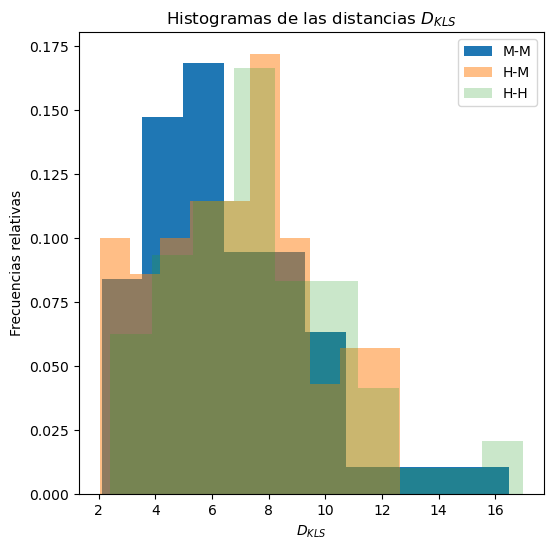

In [86]:
fig,ax=plt.subplots()
fig.set_size_inches((6,6))
ax.hist(D_KLS_MM,label='M-M',density=True,alpha=1)
ax.hist(D_KLS_HM,label='H-M',density=True,alpha=0.5)
ax.hist(D_KLS_HH,label='H-H',density=True,alpha=0.25)

ax.set_xlabel('$D_{KLS}$')
ax.set_ylabel('Frecuencias relativas')
ax.set(title='Histogramas de las distancias $D_{KLS}$')

ax.legend()

# Prueba de Normalidad

In [87]:
# 
from scipy.stats import ks_1samp
from scipy.stats import ttest_1samp
from scipy.stats import wilcoxon
from scipy import stats

In [88]:
alpha = 0.05
alpha_bonferroni = alpha / 3

test_norm = pd.DataFrame(columns=['statistics','p-value','H0'])
comparations = ['M-F','F-F','M-M']

norm_test = ks_1samp(D_KLS_HM,stats.norm.cdf)
if norm_test.pvalue <= alpha_bonferroni:
    test_norm.loc['M-F']=[norm_test.statistic,norm_test.pvalue,False]
else:
    test_norm.loc['M-F']=[norm_test.statistic,norm_test.pvalue,True]


norm_test = ks_1samp(D_KLS_MM,stats.norm.cdf)
if norm_test.pvalue <= alpha_bonferroni:
    test_norm.loc['F-F']=[norm_test.statistic,norm_test.pvalue,False]
else:
    test_norm.loc['F-F']=[norm_test.statistic,norm_test.pvalue,True]


norm_test = ks_1samp(D_KLS_MM,stats.norm.cdf)
if norm_test.pvalue <= alpha_bonferroni:
    test_norm.loc['M-M']=[norm_test.statistic,norm_test.pvalue,False]
else:
    test_norm.loc['M-M']=[norm_test.statistic,norm_test.pvalue,True]

print(f'Significancia: {alpha_bonferroni:.2}')
print(f'Intervalo de confianza: {100*(1-alpha_bonferroni)}')
test_norm

Significancia: 0.017
Intervalo de confianza: 98.33333333333333


,statistics,p-value,H0
M-F,0.982106,9.548257e-116,False
F-F,0.982254,5.524530e-116,False
M-M,0.982254,5.524530e-116,False


# Realizamos un test de Mann Whitney - U


In [89]:
import scipy.stats as st

In [90]:
test = pd.DataFrame(columns=['statics','p-value','H0'])
U_test = st.mannwhitneyu(D_KLS_HM,D_KLS_HH)
if U_test.pvalue <= alpha:
    test.loc['MF - MM']=[U_test.statistic,U_test.pvalue,False]
else: 
    test.loc['MF - MM']=[U_test.statistic,U_test.pvalue,True]

U_test = st.mannwhitneyu(D_KLS_HM,D_KLS_MM)
if U_test.pvalue <= alpha:
    test.loc['MF - FF']=[U_test.statistic,U_test.pvalue,False]
else: 
    test.loc['MF - FF']=[U_test.statistic,U_test.pvalue,True]
    
test

,statics,p-value,H0
MF - MM,1864.0,0.153642,True
MF - FF,2391.0,0.333485,True


In [37]:
def t_test(data0,data1):
    n0=data0.shape[0]
    n1=data1.shape[0]
    mu0=data0.mean()
    mu1=data1.mean()
    var0=np.var(data0)
    var1=np.var(data1)

    t = (mu0-mu1)/np.sqrt(var0/n0 + var1/n1)

    #Estimamos los grados de libertad desbalanceados 

    v =  (var0/n0 + var1/n1) **2 / ( ((var0/n0)**2  / (n0-1)) +  ((var1/n1)**2  / (n1-1)))

    #Distribución t-student
    t_student = st.t(df=v)

    #p-value
    p_value = 2*t_student.cdf(-np.abs(t))
    return t,p_value

Hipotesis Nula: no hay diferencias entre las medias: $μ_{x}=μ_{y}$

In [44]:
table = {}
table['HM - HH'] = {}
table['HM - HH']['t-test'] , table['HM - HH']['p-value'] = t_test(D_KLS_HM,D_KLS_HH)
table['HM - MM'] = {}
table['HM - MM']['t-test'] , table['HM - MM']['p-value'] = t_test(D_KLS_HM,D_KLS_MM)
table['HH - MM'] = {}
table['HH - MM']['t-test'] , table['HH - MM']['p-value'] = t_test(D_KLS_HH,D_KLS_MM)

t_test_table=pd.DataFrame(table).transpose()
t_test_table

,t-test,p-value
HM - HH,-1.465300,0.144801
HM - MM,0.734814,0.463721
HH - MM,1.923889,0.056390


---------------------------------------------------------------------------------------

# Dividimos los datos por el tipo de imagenería motora

In [ ]:
labels = np.unique(DATA['sub-001']['labels_trials'])

for participant in participants:
    data = DATA[participant]['data_csp']
    DATA[participant]['data_csp_class1']=data[:,DATA[participant]['labels_trials'] == labels[0]]
    DATA[participant]['data_csp_class2']=data[:,DATA[participant]['labels_trials'] == labels[1]]
    
    DATA[participant]['mu_csp_class1']=data[:,DATA[participant]['labels_trials'] == labels[0]].mean(axis=1) 
    DATA[participant]['mu_csp_class2']=data[:,DATA[participant]['labels_trials'] == labels[1]].mean(axis=1) # Se puede quitar el keepdims
    DATA[participant]['sigma_csp_class1']=np.cov(data[:,DATA[participant]['labels_trials'] == labels[0]])
    DATA[participant]['sigma_csp_class2']=np.cov(data[:,DATA[participant]['labels_trials'] == labels[1]])
    
DATA_TABLE = pd.DataFrame(DATA).transpose()
DATA_TABLE.reset_index(inplace=True)
DATA_TABLE.rename(columns = {'index':'subject'},inplace = True)
DATA_TABLE

# Graficamos


In [ ]:
# Aplicamos PCA
data_csp_pca_class1=[]
mu_csp_pca_class1=[]
sigma_csp_pca_class1=[]
eig_val_pca_class1=[]
data_csp_pca_class2=[]
mu_csp_pca_class2=[]
sigma_csp_pca_class2=[]
eig_val_pca_class2=[]
for it in range(len(DATA_TABLE)):
    X = DATA_TABLE.iloc[it]['data_csp_class1']
    pca_=pca()
    eig_val , _= pca_.Fit(X = X)
    X_proj = pca_.Project(X,n=2,plot=False)
    data_csp_pca_class1.append(X_proj)
    eig_val_pca_class1.append(eig_val)
    mu_csp_pca_class1.append(data_csp_pca_class1[-1].mean(axis=1))
    sigma_csp_pca_class1.append(np.cov(data_csp_pca_class1[-1]))
    
    X = DATA_TABLE.iloc[it]['data_csp_class2']
    pca_=pca()
    eig_val , _= pca_.Fit(X = X)
    X_proj = pca_.Project(X,n=2,plot=False)
    data_csp_pca_class2.append(X_proj)
    eig_val_pca_class2.append(eig_val)
    mu_csp_pca_class2.append(data_csp_pca_class2[-1].mean(axis=1))
    sigma_csp_pca_class2.append(np.cov(data_csp_pca_class2[-1]))
    
# Vemos los eigenvalues
fig,ax = plt.subplots()
a=1
for it in range(len(DATA_TABLE)):  
    x=np.linspace(0,len(eig_val_pca_class1[it]),len(eig_val_pca_class1[it]))
    ax.bar(x,eig_val_pca_class1[it],alpha=a)
    a-=0.005

fig,ax = plt.subplots()
a=1
for it in range(len(DATA_TABLE)):  
    x=np.linspace(0,len(eig_val_pca_class2[it]),len(eig_val_pca_class2[it]))
    ax.bar(x,eig_val_pca_class2[it],alpha=a)
    a-=0.005



In [ ]:
#Graficamos los datos de hombre
fig , ax = plt.subplots()
fig.set_size_inches((12,12))

n_std=3.
#len(DATA_TABLE)
for it in index_h[1:3]:
    ax.scatter(data_csp_pca_class1[it][0,:],data_csp_pca_class1[it][1,:],
                   marker='o',cmap='tab20b',color="C{}".format(it),facecolors='none',
                   alpha=0.25)
    ax.scatter(data_csp_pca_class2[it][0,:],data_csp_pca_class2[it][1,:],
                   marker='s',cmap='tab20b',color="C{}".format(it),facecolors='none',
                   alpha=0.25)
for it in index_h[1:3]:
    ax.scatter(mu_csp_pca_class1[it][0],mu_csp_pca_class1[it][1],marker='o',cmap='tab20b',color="C{}".format(it),label=f"H{it} class 1")
    ax = Plot_Ellipse_Distribution(mu_csp_pca_class1[it], sigma_csp_pca_class1[it], nstd =1., ax=ax,color="C{}".format(it))
    ax.scatter(mu_csp_pca_class2[it][0],mu_csp_pca_class2[it][1],marker='o',cmap='tab20b',color="C{}".format(it),label=f"H{it} class 2")
    ax = Plot_Ellipse_Distribution(mu_csp_pca_class2[it], sigma_csp_pca_class2[it], nstd =1., ax=ax,color="C{}".format(it))
    
ax.set_xlabel('X1 pca')
ax.set_ylabel('X2 pca')
ax.set_title('PCA para hombres ')
ax.legend()
ax.set_aspect('equal', adjustable='datalim')

In [ ]:
#Graficamos los datos de mujeres
fig , ax = plt.subplots()
fig.set_size_inches((12,12))

n_std=3.
#len(DATA_TABLE)
for it in index_m[1:3]:
    ax.scatter(data_csp_pca_class1[it][0,:],data_csp_pca_class1[it][1,:],
                   marker='^',cmap='tab20b',color="C{}".format(it),facecolors='none',
                   alpha=0.25)
    ax.scatter(data_csp_pca_class2[it][0,:],data_csp_pca_class2[it][1,:],
                   marker='P',cmap='tab20b',color="C{}".format(it),facecolors='none',
                   alpha=0.25)
for it in index_m[1:3]:
    ax.scatter(mu_csp_pca_class1[it][0],mu_csp_pca_class1[it][1],marker='^',cmap='tab20b',color="C{}".format(it),label=f"M{it} class 1")
    ax = Plot_Ellipse_Distribution(mu_csp_pca_class1[it], sigma_csp_pca_class1[it], nstd =1., ax=ax,color="C{}".format(it))
    ax.scatter(mu_csp_pca_class2[it][0],mu_csp_pca_class2[it][1],marker='P',cmap='tab20b',color="C{}".format(it),label=f"M{it} class 2")
    ax = Plot_Ellipse_Distribution(mu_csp_pca_class2[it], sigma_csp_pca_class2[it], nstd =1., ax=ax,color="C{}".format(it))
    
ax.set_xlabel('X1 pca')
ax.set_ylabel('X2 pca')
ax.set_title('PCA para mujeres ')
ax.legend()
ax.set_aspect('equal', adjustable='datalim')

In [ ]:
fig , ax = plt.subplots()
fig.set_size_inches((6,6))

n_std=3.
#len(DATA_TABLE)
it=0
for it_m, it_h in (index_m[1:3], index_h[1:3]):
    ax.scatter(data_csp_pca_class1[it_m][0,:],data_csp_pca_class1[it_m][1,:],
                   marker='^',cmap='tab20b',color="C{}".format(it),facecolors='none',
                   alpha=0.25)
    
    ax.scatter(data_csp_pca_class1[it_h][0,:],data_csp_pca_class1[it_h][1,:],
                   marker='o',cmap='tab20b',color="C{}".format(it+1),facecolors='none',
                   alpha=0.25)
    
    ax.scatter(data_csp_pca_class2[it_m][0,:],data_csp_pca_class2[it_m][1,:],
                   marker='P',cmap='tab20b',color="C{}".format(it),facecolors='none',
                   alpha=0.25)
    
    ax.scatter(data_csp_pca_class2[it_h][0,:],data_csp_pca_class2[it_h][1,:],
                   marker='s',cmap='tab20b',color="C{}".format(it+1),facecolors='none',
                   alpha=0.25)
    it+=2

it=0
for it_m, it_h in (index_m[1:3], index_h[1:3]):
    ax.scatter(mu_csp_pca_class1[it_m][0],mu_csp_pca_class1[it_m][1],
               marker='^',cmap='tab20b',color="C{}".format(it),
               label=f"M{it_m} clase 1")
    ax = Plot_Ellipse_Distribution(mu_csp_pca_class1[it_m], sigma_csp_pca_class1[it_m], nstd =1., ax=ax,color="C{}".format(it))
    ax.scatter(mu_csp_pca_class2[it_m][0],mu_csp_pca_class2[it_m][1],
               marker='P',cmap='tab20b',color="C{}".format(it),
               label=f"M{it_m} clase 2")
    ax = Plot_Ellipse_Distribution(mu_csp_pca_class2[it_m], sigma_csp_pca_class2[it_m], nstd =1., ax=ax,color="C{}".format(it))
    
    ax.scatter(mu_csp_pca_class1[it_h][0],mu_csp_pca_class1[it_h][1],
               marker='o',cmap='tab20b',color="C{}".format(it+1),
               label=f"H{it_h} clase 1")
    ax = Plot_Ellipse_Distribution(mu_csp_pca_class1[it_h], sigma_csp_pca_class1[it_h], nstd =1., ax=ax,color="C{}".format(it+1))
    
    ax.scatter(mu_csp_pca_class2[it_h][0],mu_csp_pca_class2[it_h][1],
               marker='s',cmap='tab20b',color="C{}".format(it+1),
               label=f"H{it_h} clase 2")
    ax = Plot_Ellipse_Distribution(mu_csp_pca_class2[it_h], sigma_csp_pca_class2[it_h], nstd =1., ax=ax,color="C{}".format(it+1))
    
    
    it+=2
    
    
it=0

ax.set_xlabel('X1 pca')
ax.set_ylabel('X2 pca')
ax.set_title('PCA para dos hombres y mujeres ')
ax.legend()
ax.set_aspect('equal', adjustable='datalim')

In [ ]:
DATA[participant]['data_csp_class1']=data[:,DATA[participant]['labels_trials'] == labels[0]]
DATA[participant]['data_csp_class2']=data[:,DATA[participant]['labels_trials'] == labels[1]]

DATA[participant]['mu_csp_class1']=data[:,DATA[participant]['labels_trials'] == labels[0]].mean(axis=1) 
DATA[participant]['mu_csp_class2']=data[:,DATA[participant]['labels_trials'] == labels[1]].mean(axis=1) # Se puede quitar el keepdims
DATA[participant]['sigma_csp_class1']=np.cov(data[:,DATA[participant]['labels_trials'] == labels[0]])
DATA[participant]['sigma_csp_class2']

In [ ]:
data_mu_csp_class1= np.zeros((6,len(DATA_TABLE)))
data_sigma_csp_class1 = np.zeros((6,6,len(DATA_TABLE)))
data_mu_csp_class2= np.zeros((6,len(DATA_TABLE)))
data_sigma_csp_class2 = np.zeros((6,6,len(DATA_TABLE)))
for it in range(len(DATA_TABLE)):
    data_mu_csp_class1[:,it]= DATA_TABLE['mu_csp_class1'][it]
    data_sigma_csp_class1[:,:,it]= DATA_TABLE['sigma_csp_class1'][it]
    data_mu_csp_class2[:,it]= DATA_TABLE['mu_csp_class2'][it]
    data_sigma_csp_class2[:,:,it]= DATA_TABLE['sigma_csp_class2'][it]

In [ ]:
D_KLS_class1=np.zeros((len(DATA_TABLE),len(DATA_TABLE)))
D_KLS_class2=np.zeros((len(DATA_TABLE),len(DATA_TABLE)))
for it0 in range(0,len(DATA_TABLE)-1):
    for it1 in range(it0+1,len(DATA_TABLE)):
        mu_p = data_mu_csp_class1[:,it0]
        mu_q = data_mu_csp_class1[:,it1]
        sigma_p = data_sigma_csp_class1[:,:,it0]
        sigma_q = data_sigma_csp_class1[:,:,it1]
        D_KLS_class1[it0,it1]=Symmetrised_Divergence_KL(mu_p,mu_q,sigma_p,sigma_q)
        
        mu_p = data_mu_csp_class2[:,it0]
        mu_q = data_mu_csp_class2[:,it1]
        sigma_p = data_sigma_csp_class2[:,:,it0]
        sigma_q = data_sigma_csp_class2[:,:,it1]
        D_KLS_class2[it0,it1]=Symmetrised_Divergence_KL(mu_p,mu_q,sigma_p,sigma_q)
        
print(D_KLS_class2)

In [ ]:
# Estimamos la divergencia de Kullback-Lleiber
D_KLS_HM_class1 = []
D_KLS_HM_class2 = []
for idx_h in index_h:
    for idx_m in index_m:
        if D_KLS_class1[idx_h,idx_m]!=0.:
            D_KLS_HM_class1.append(D_KLS_class1[idx_h,idx_m])
        if D_KLS_class2[idx_h,idx_m]!=0.:
            D_KLS_HM_class2.append(D_KLS_class2[idx_h,idx_m])
            
for idx_m in index_m:
    for idx_h in index_h:
        if D_KLS_class1[idx_m,idx_h]!=0.:
            D_KLS_HM_class1.append(D_KLS_class1[idx_m,idx_h])
        if D_KLS_class2[idx_m,idx_h]!=0.:
            D_KLS_HM_class2.append(D_KLS_class2[idx_m,idx_h])
            
D_KLS_HM_class1=np.array(D_KLS_HM_class1)
D_KLS_HM_class2=np.array(D_KLS_HM_class2)
print(D_KLS_HM_class1)
print(D_KLS_HM_class2)

In [ ]:
D_KLS_HH_class1 = []
D_KLS_HH_class2 = []
for idx_h0 in index_h:
    for idx_h1 in index_h:
        if D_KLS_class1[idx_h0,idx_h1]!=0:
            D_KLS_HH_class1.append(D_KLS_class1[idx_h0,idx_h1])
        if D_KLS_class2[idx_h0,idx_h1]!=0:
            D_KLS_HH_class2.append(D_KLS_class2[idx_h0,idx_h1])
D_KLS_HH_class1=np.array(D_KLS_HH_class1)
D_KLS_HH_class2=np.array(D_KLS_HH_class2)

In [ ]:
D_KLS_MM_class1 = []
D_KLS_MM_class2 = []
for idx_m0 in index_m:
    for idx_m1 in index_m:
        if D_KLS_class1[idx_m0,idx_m1]!=0:
            D_KLS_MM_class1.append(D_KLS_class1[idx_m0,idx_m1])
        if D_KLS_class2[idx_m0,idx_m1]!=0:
            D_KLS_MM_class2.append(D_KLS_class2[idx_m0,idx_m1])
D_KLS_MM_class1=np.array(D_KLS_MM_class1)
D_KLS_MM_class2=np.array(D_KLS_MM_class2)

In [ ]:
fig,ax=plt.subplots()
fig.set_size_inches((6,6))
ax.hist(D_KLS_MM_class1,label='M-M',density=True,alpha=1)
ax.hist(D_KLS_HM_class1,label='H-M',density=True,alpha=0.5)
ax.hist(D_KLS_HH_class1,label='H-H',density=True,alpha=0.25)

ax.set_xlabel('$D_{KLS}$')
ax.set_ylabel('Frecuencias relativas')
ax.set(title='Histogramas de las distancias $D_{KLS}$')
ax.legend()

In [ ]:
fig,ax=plt.subplots()
fig.set_size_inches((6,6))
ax.hist(D_KLS_MM_class2,label='M-M',density=True,alpha=1)
ax.hist(D_KLS_HM_class2,label='H-M',density=True,alpha=0.5)
ax.hist(D_KLS_HH_class2,label='H-H',density=True,alpha=0.25)
ax.set_xlabel('$D_{KLS}$')
ax.set_ylabel('Frecuencias relativas')
ax.set(title='Histogramas de las distancias $D_{KLS}$')
ax.legend()

In [ ]:
table = {}
table['HM - HH'] = {}
table['HM - HH']['t-test'] , table['HM - HH']['p-value'] = st.mannwhitneyu(D_KLS_HM_class1,D_KLS_HH_class1)
table['HM - MM'] = {}
table['HM - MM']['t-test'] , table['HM - MM']['p-value'] = st.mannwhitneyu(D_KLS_HM_class1,D_KLS_MM_class1)
table['HH - MM'] = {}
table['HH - MM']['t-test'] , table['HH - MM']['p-value'] = st.mannwhitneyu(D_KLS_HH_class1,D_KLS_MM_class1)

mannwhitneyu_test_table=pd.DataFrame(table).transpose()
mannwhitneyu_test_table

In [ ]:
table = {}
table['HM - HH'] = {}
table['HM - HH']['t-test'] , table['HM - HH']['p-value'] = st.mannwhitneyu(D_KLS_HM_class2,D_KLS_HH_class2)
table['HM - MM'] = {}
table['HM - MM']['t-test'] , table['HM - MM']['p-value'] = st.mannwhitneyu(D_KLS_HM_class2,D_KLS_MM_class2)
table['HH - MM'] = {}
table['HH - MM']['t-test'] , table['HH - MM']['p-value'] = st.mannwhitneyu(D_KLS_HH_class2,D_KLS_MM_class2)

mannwhitneyu_test_table=pd.DataFrame(table).transpose()
mannwhitneyu_test_table